In [12]:
import numpy as np
import pandas as pd
import time
from amc_parser import *
from T3Dviewer import *
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%autosave 120


Autosaving every 120 seconds


root:
    Order - Values [TX TY TZ : Translation, RX RY RZ: rotation] Channels of motion on VICON
    
Data information:
    root:
    order, axis, position, orientation
    bonedata:
    id, name, direction, length, axis, dof, limits (?), parent, child

end goal:
get table of global position for each part ([x,y,z]-data)(bone-column)(time-row)

In [5]:
#abs_path = os.getcwd()
asf_path = 'data\\01.asf'
amc_path = 'data\\01_01.amc'
joints = parse_asf(asf_path)
motions = parse_amc(amc_path)


In [6]:
a=list(joints.keys())
MCapVal = pd.DataFrame(data=None,columns=a)

#for j in joints.values():
    #j.name
    #(j.__dict__.keys())
    

In [7]:
#motion is a list -> dict
motions[0]['root']
#np.reshape(np.array(motions[0]['root'][:3]), [3, 1])

[9.37216, 17.8693, -17.3198, -2.01677, -7.59696, -3.23164]

In [7]:
#joints['root'].set_motion(motions[1])
#loopList = range(len(motions))


In [14]:
a=[]
b=list(joints.keys())
MCapVal = pd.DataFrame(data=None,columns=b)
loopList = range(len(motions))

for i in loopList[1:]:
    joints['root'].set_motion(motions[i])
    for j in joints.values():
        a.append(j.coordinate)
        #print(j.name)
        #MCapVal[j.name].append(j.coordinate)
    #print(a)
    MCapVal.loc[len(MCapVal), :] = a
    a=[]
    #break
#MCapVal
#MCapVal.append(a)

    root lhipjoint rhipjoint lowerback
    lhipjoint lfemur
    lfemur ltibia
    ltibia lfoot
    lfoot ltoes
    rhipjoint rfemur
    rfemur rtibia
    rtibia rfoot
    rfoot rtoes
    lowerback upperback
    upperback thorax
    thorax lowerneck lclavicle rclavicle
    lowerneck upperneck
    upperneck head
    lclavicle lhumerus
    lhumerus lradius
    lradius lwrist
    lwrist lhand lthumb
    lhand lfingers
    rclavicle rhumerus
    rhumerus rradius
    rradius rwrist
    rwrist rhand rthumb
    rhand rfingers
    
Order:
0:1,6,11
1:2
2:3
3:4
4:5
6:7
7:8
8:9
9:10
11:12
12:13
13:14,17,24
14:15
15:16
17:18
18:19
19:20
20:21,23
21:22
24:25
25:26
26:27
27:28,30
28:29
Parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
Child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

<IPython.core.display.Javascript object>


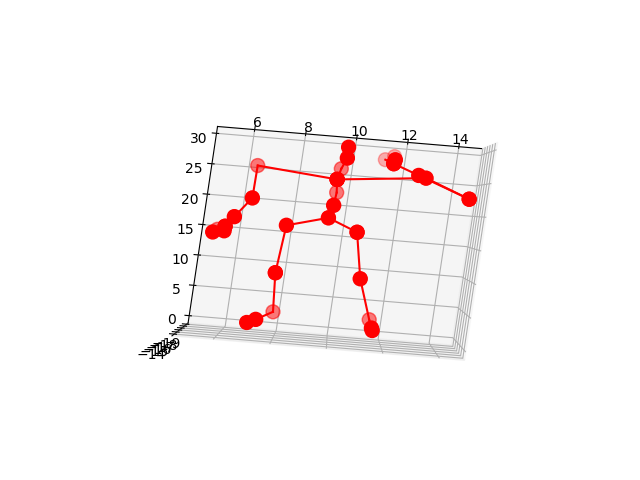

In [13]:


parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

#MCapVal.iloc[0,:] all in this row
#list(range(len(MCapVal.columns.values)))
#pd.DataFrame(MCapVal.columns.values)

#x,y,z = [MCapVal.iloc[0,0][j] for j in range(3)]
#print(x,y,z,MCapVal.iloc[0,0])
#MCapVal.iloc[0,0][0]
#[MCapVal.iloc[0,parent[0]][0][0], MCapVal.iloc[0,child[0]][0][0]]

ax = plt.gca(projection="3d")

for i in range(len(parent)):
    x,y,z = [[MCapVal.iloc[0,parent[i]][j][0], MCapVal.iloc[0,child[i]][j][0]] for j in range(3)] 
    ax.scatter(x,y,z,c='r', s=100)
    ax.plot(x,y,z, c='r')

#plt.close()
#len(a)
#a
#MCapVal
#joints['ltibia'].__dict__

In [130]:
#ax = plt.gca(projection="3d")
#ax.plot([x[0],x[1]],[y[0],y[1]],[z[0],z[1]], 'ro')
x,y,z
#plt.show()
#a=joints['head'].coordinate

([5.358981732808545, 5.201548767021075],
 [14.692623410916266, 14.216056866084873],
 [-16.311197083808818, -16.30985699730772])

In [19]:

#euler2mat(*a)
#euler2mat(*a)

Autosaving every 180 seconds


In [10]:
with open('./data/01.asf') as f:
    content = f.read().splitlines()

In [25]:
for c, value in enumerate(content, 0):
    if 'begin' in value:
        print (c)

17
24
35
44
54
63
70
81
90
100
109
120
131
142
153
164
175
185
196
205
214
224
233
243
253
264
273
282
292
301
312
